<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### For the "Median value of owner-occupied homes" provide a boxplot

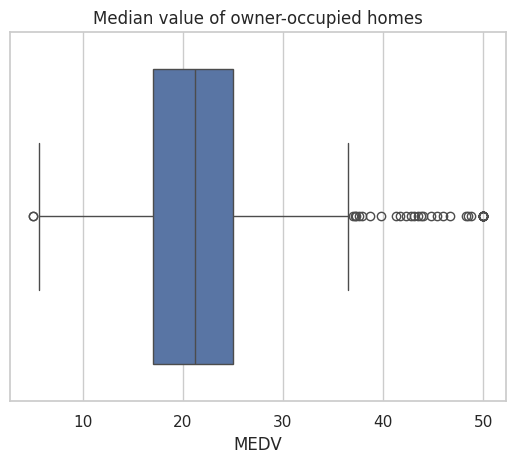

In [22]:
ax = sns.boxplot(x='MEDV',  data=boston_df).set_title('Median value of owner-occupied homes (MEDV)')


#### Provide a  bar plot for the Charles river variable

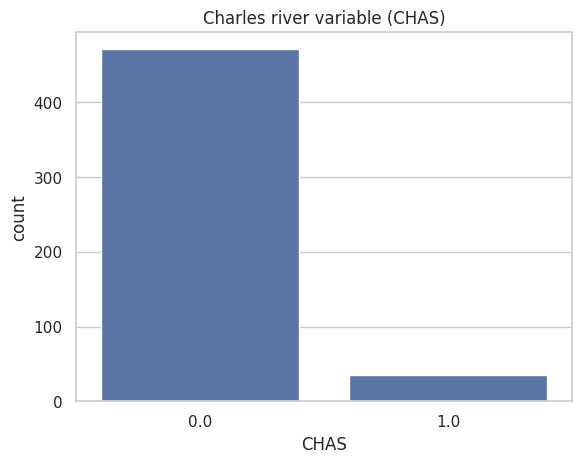

In [31]:
sns.set(style="whitegrid")
ax = sns.countplot(x="CHAS", data=boston_df).set_title('Charles river variable (CHAS)')


#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

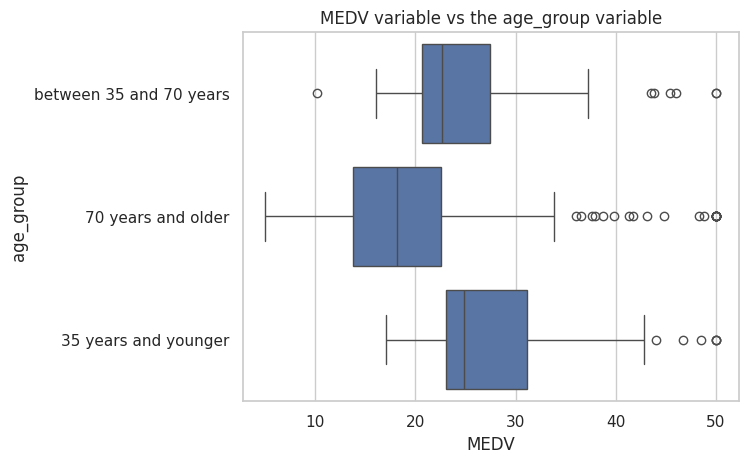

In [24]:


boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

#boston_df['age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<= 35 years', '35-70 years', '> 70 years'])

ax2 = sns.boxplot(x='MEDV', y='age_group', data=boston_df).set_title('MEDV variable vs the age_group variable')


#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

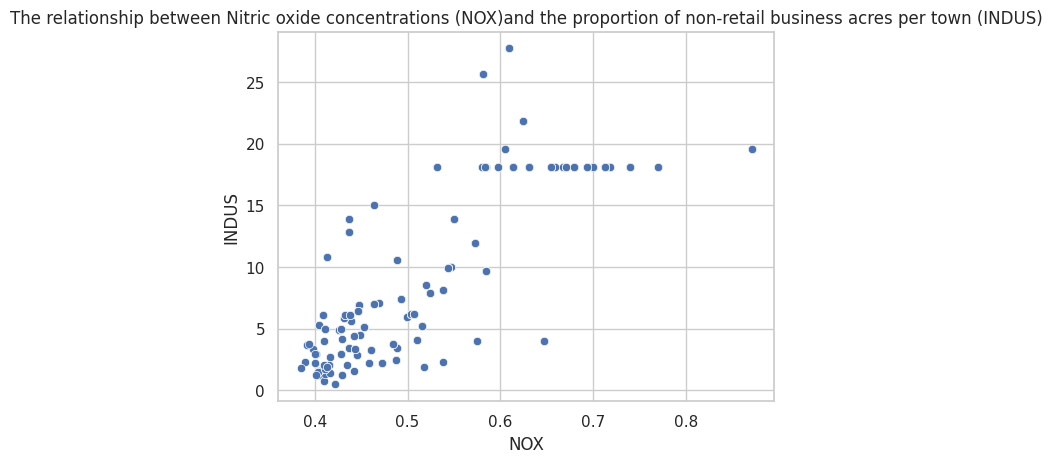

In [25]:

ax = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df).set_title('The relationship between Nitric oxide concentrations (NOX)and the proportion of non-retail business acres per town (INDUS)')



It seems there is a positive relationship between nitric oxide concentrations and the proportion of non-retail business acres. 

#### Create a histogram for the pupil to teacher ratio variable

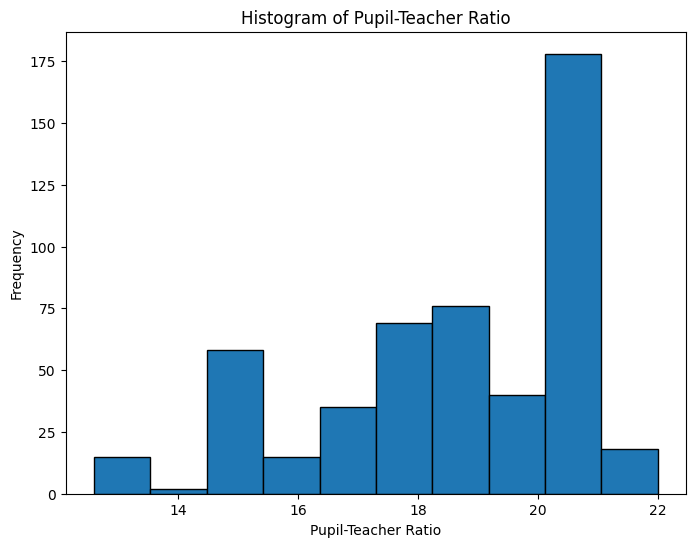

In [11]:
#p = sns.catplot(x='PTRATIO', kind='count', data=boston_df).set_title('Histogram for the pupil to teacher ratio variable (PTRATIO)')
#p.set_xticklabels(rotation=60, size = 5)
pyplot.figure(figsize=(8, 6))
pyplot.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

null hypothesis = there is no significant difference in median value of houses bounded by the Charles river
alternative hypothesis = there is no significant difference in median value of houses bounded by the Charles river

In [35]:
#scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   #boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

#I found that the variances are not equal

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)



TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

p-value is less than alpha, therefore we reject null hzphothesis and the answer is  YES,THERE IS SIGNIFICANT DIFFERENCE

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

nULL hzpothesis: there is no difference in  Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
Alternative hyphothesis: there is difference in  Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [28]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))



F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


p-value is less than alpha, therefore we reject null hzphothesis and the answer is  YES, THERE IS SIGNIFICANT DIFFERENCE

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
Yes, we can, because of p value

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [30]:
### X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        15:17:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

WITH 1 POINT OF WEIGHTED DISTANCE, THE MEDIAN VALUE OF OWNER OCCUPIED HOMES RISES BY 1.0916 POINT